In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [108]:
from src import data, viz

In [17]:
import os
import IPython

In [71]:
cosmo_raw = os.path.join(
    data.data_root, 'external', 'COSMO', 'INSERM_datapool_cleaned rawdata_COSMO_Wave 01 to 13.sav'
)

In [72]:
df = pd.read_spss(cosmo_raw, convert_categoricals=False)

In [18]:
print(IPython.utils.text.columnize(list(df.columns),displaywidth=99))

TIME                    EP_CROWD                   POL_HARVEST           TRUST_STATE_RADIO   
lfdn                    EP_EATING                  POL_HOME              TRUST_STATE_TV      
p_0001                  EP_HANDSHAKE               POL_IMMUN             TRUST_WHO           
p_0002                  EP_HANDWASH                POL_INTERNET          TRUST2_BMG          
AFF_DISTANCE            EP_HANDWASH20              POL_LIVING            TRUST2_BZGA         
AFF_FEAR                EP_HOME                    POL_LOCAL_EVENT       TRUST2_CARE         
AFF_HELPLESSNESS        EP_MASK                    POL_LOCAL_SCHOOL      TRUST2_CONVERSATIONS
AFF_HYPE                EP_SANITIZER               POL_MASK              TRUST2_DOC          
AFF_NOVELITY            EP_SPACE150                POL_NONE              TRUST2_INFECT       
AFF_SCIENCE             EP_SQUAR_WITH              POL_NORM              TRUST2_INTERNET     
AFF_SPREAD              EP_SQUAR_WITHOUT           POL_PRICI

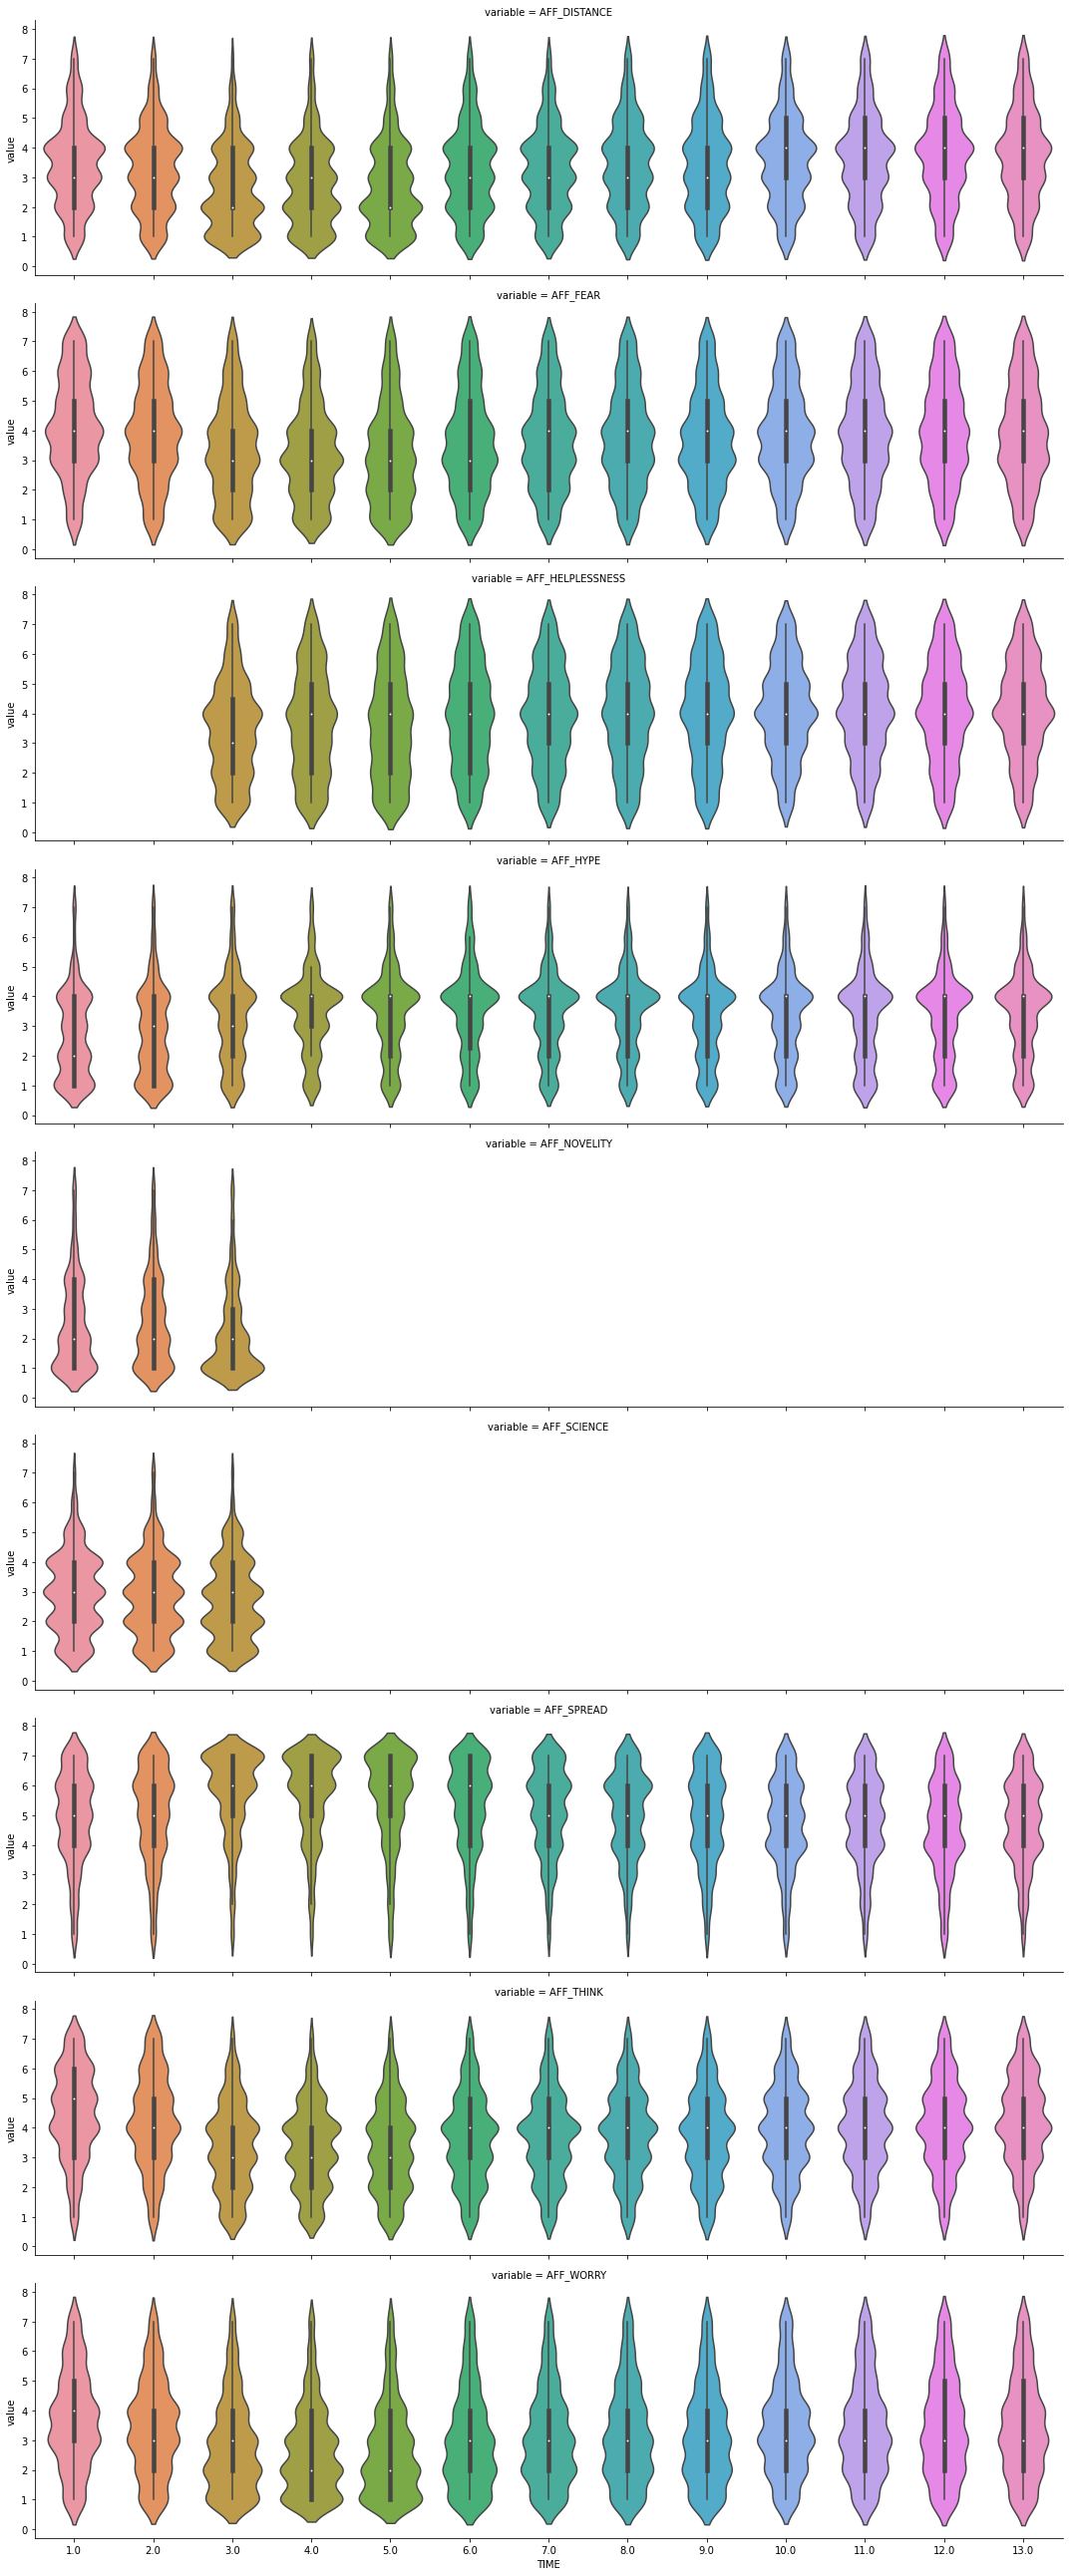

In [24]:
sns.catplot(
    data=df.filter(regex='TIME|^AFF',axis=1).melt('TIME', var_name='variable', value_name='value'),
    x='TIME', 
    y='value',
    row='variable',
    kind='violin',
    height=4,
    aspect=15/4
)

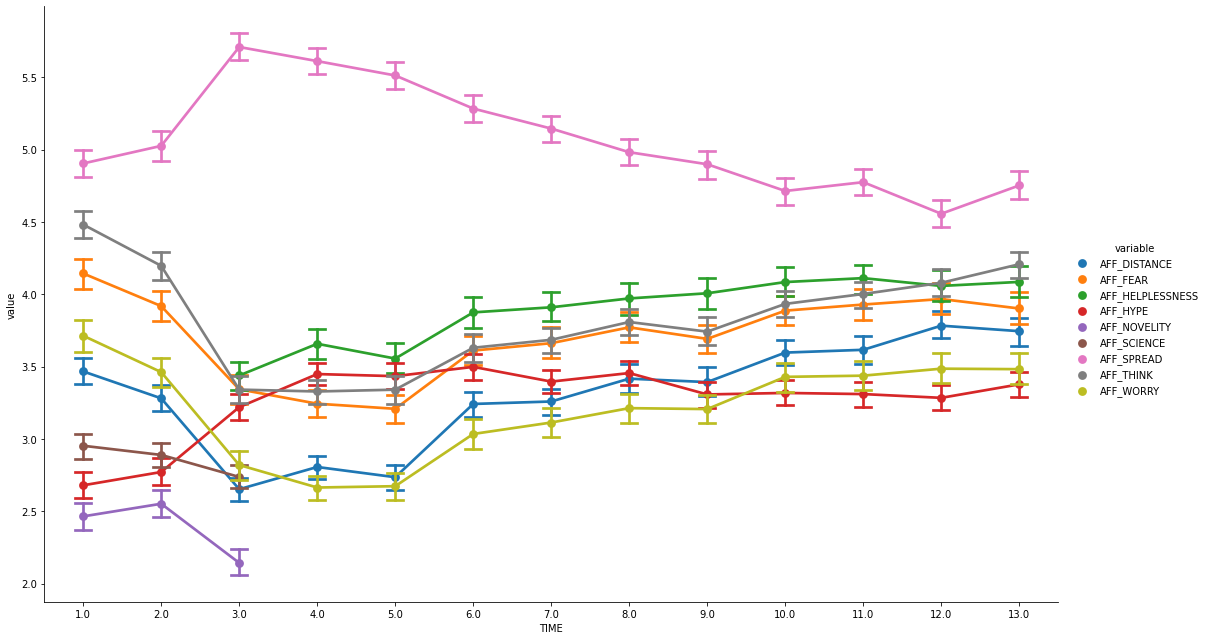

In [19]:
sns.catplot(
    data=df.filter(regex='TIME|^AFF',axis=1).melt('TIME', var_name='variable', value_name='value'),
    x='TIME', 
    y='value',
    hue='variable',
    kind='point',
    capsize=0.2,
    height=9,
    aspect=15/9
)

In [73]:
df_aff = df.filter(
    regex='TIME|^AFF_FEAR|^AFF_THINK|^AFF_WORRY',
    axis=1
).dropna(
    axis=1
).groupby(
    'TIME'
).mean()
df_aff = (df_aff -1 ) / 6 # data range 1-7 -> 0-1

Text(0, 0.5, 'normalized values')

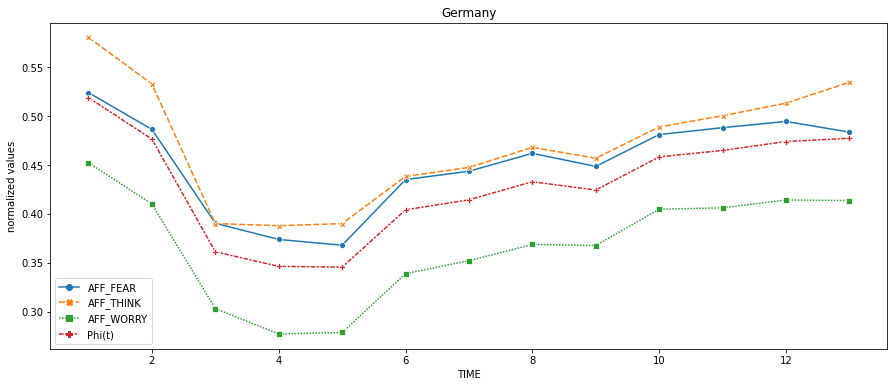

In [75]:
fig, ax = plt.subplots()
sns.lineplot(
    data=pd.concat(
        [
            df_aff,
            df_aff.mean(axis=1).to_frame(name='Phi(t)')
        ]
    ),
    markers=True,
    ax=ax
)
ax.set_title('Germany')
ax.set_ylabel('normalized values')

And now the same for Denmark

In [56]:
import scipy.io as sio

In [80]:
df = data.load_raw_cosmo_dk(f"{data.data_root}/external/COSMO_dk/COSMO_DK_crossSectional.mat")

In [93]:
df_aff = df.filter(
    regex='^TIME|^AFF_FEAR|^AFF_THINK|^AFF_WORRY',
    axis=1
).groupby(
    'TIME'
).mean()
df_aff = (df_aff -1 ) / 6 # data range 1-7 -> 0-1

Text(0, 0.5, 'normalized values')

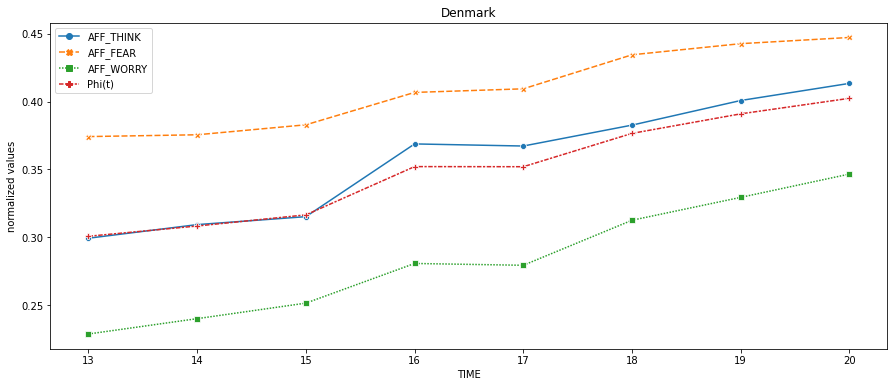

In [94]:
fig, ax = plt.subplots()
sns.lineplot(
    data=pd.concat(
        [
            df_aff,
            df_aff.mean(axis=1).to_frame(name='Phi(t)')
        ]
    ),
    markers=True,
    ax=ax
)

ax.set_title('Denmark')
ax.set_ylabel('normalized values')

Text(0, 0.5, 'normalized values')

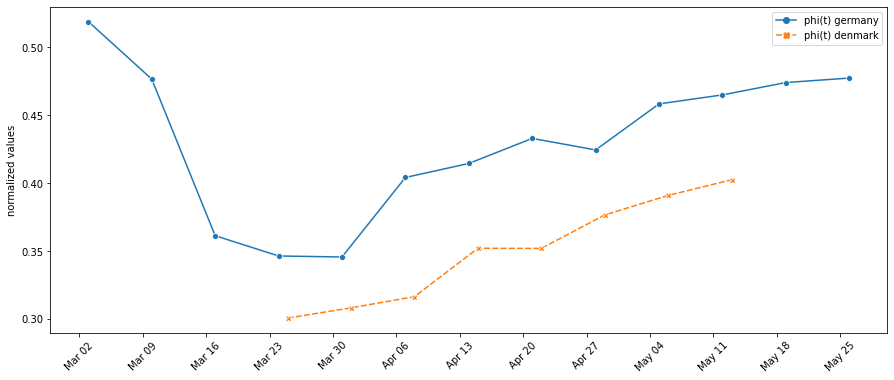

In [112]:
fig, ax = plt.subplots()
sns.lineplot(
    data=pd.concat(
        [
            data.load_cosmo_phi(country='germany').rename(axis='columns',mapper={'phi':'phi(t) germany'}),
            data.load_cosmo_phi(country='denmark').rename(axis='columns',mapper={'phi':'phi(t) denmark'})
        ]
    ),
    markers=True,
    ax=ax
)
viz.format_xaxis_dates(ax)
ax.set_xlabel('')
ax.set_ylabel('normalized values')
